# 什么是TensorFlow

TensorFlow™ 是一个采用数据流图（data flow graphs），用于数值计算的开源软件库。节点（Nodes）在图中表示数学操作，图中的线（edges）则表示在节点间相互联系的多维数据数组，即张量（tensor）。它灵活的架构让你可以在多种平台上展开计算，例如台式计算机中的一个或多个CPU（或GPU），服务器，移动设备等等。TensorFlow 最初由Google大脑小组（隶属于Google机器智能研究机构）的研究员和工程师们开发出来，用于机器学习和深度神经网络方面的研究，但这个系统的通用性使其也可广泛用于其他计算领域。

## 什么是数据流图

数据流图用“结点”（nodes）和“线”(edges)的有向图来描述数学计算。“节点” 一般用来表示施加的数学操作，但也可以表示数据输入（feed in）的起点/输出（push out）的终点，或者是读取/写入持久变量（persistent variable）的终点。“线”表示“节点”之间的输入/输出关系。这些数据“线”可以输运“size可动态调整”的多维数据数组，即“张量”（tensor）。张量从图中流过的直观图像是这个工具取名为“Tensorflow”的原因。一旦输入端的所有张量准备好，节点将被分配到各种计算设备完成异步并行地执行运算。

## TensorFlow的基本概念

- 使用图（graphs）来表示计算任务

- 在被称之为会话（session）的上下文（context）中执行图

- 使用tensor表示数据

- 使用变量（Variable）维护状态

- 使用feed和fetch可以为任意的操作赋值或者从中取出数据

TensorFlow是一个编程系统，使用图来表示计算任务，图中的节点称之为op（operation），一个op获得0或者多个Tensor，执行计算，产生0或者多个Tensor。图必须在会话中被启动。

In [1]:
import tensorflow as tf

In [2]:
# 定义两个常量，可以看到两个常量的类型都是Tensor
m1 = tf.constant([[2, 3]])

m2 = tf.constant([[3], [3]])

In [3]:
m1

<tf.Tensor 'Const:0' shape=(1, 2) dtype=int32>

In [4]:
# 定义另一个数据，其为m1和m2的积，可以看到其类型也是Tensor，而且并没有进行运算
product = tf.matmul(m1, m2)

In [5]:
product

<tf.Tensor 'MatMul:0' shape=(1, 1) dtype=int32>

In [6]:
# 定义会话，并使用默认的图来运算
sess = tf.Session()

result = sess.run(product)
print(result)

sess.close()

[[15]]


In [7]:
# 另一种使用会话的方式
with tf.Session() as sess:
    result = sess.run(product)
    print(result)

[[15]]


## hello world

In [8]:
import py_code.input_data as input_data

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [10]:
# 我们将第一个样本数字打印出来看一下
first_digits = mnist.train.images[0].reshape(28,28)

In [11]:
import matplotlib
import matplotlib.pyplot as plt

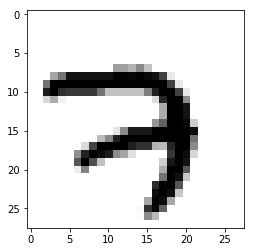

In [12]:
plt.imshow(first_digits, cmap = matplotlib.cm.binary)
plt.show()

In [13]:
# 我们看下第一样本的标签是什么
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [14]:
# 这里的向量代表数字是对应索引的可能性，我们这里需要拿到最大值索引
import numpy as np

In [15]:
np.argmax(mnist.train.labels[0])

7

### 实现回归模型

我们在观察模型发现，我们的每个样本都是一个长度为784的向量，标签是长度为10的向量。

完成一个最简单的模型，这里我们需要做如下几步操作：

- 定义占位符x，以用来输入样本
- 定义参数W
- 定义偏置b
- 定义操作y，使用sotfmax函数
- 定义成本函数，这里使用交叉熵
- 定义训练，这里使用梯度下降最小化交叉熵的方式
- 训练

In [16]:
# 定义样本占位符x，参数W，偏置b，这里W和b使用变量从全0开始训练
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [17]:
# 定义操作
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [18]:
# 定义成本函数--交叉熵
# 首先引入输入标签的占位符
y_ = tf.placeholder(tf.float32, [None, 10])
# 定义交叉熵
cross_entropy = -tf.reduce_sum(y_*tf.log(y))

In [19]:
# 定义训练
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

In [20]:
with tf.Session() as sess:
    # 初始化变量
    init = tf.global_variables_initializer()
    sess.run(init)
    # 训练1000此
    for i in range(1000):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    # 评价模型
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print (sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9146
